## last Posttest 8 ##
## 2009106091 ##
## Muhammad Fachrul Rozy ##

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as tfds
import numpy as np
from keras.models import load_model
import sys
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras import backend as K 
from sklearn.model_selection import train_test_split
from keras import callbacks


## read data mnist ##

In [107]:
(train_x, train_y), (test_x, test_y) = tfds.mnist.load_data()
print(f'jumlah x train: {len(train_x)} sepatu',
      f'jumlah y train: {len(train_y)} sepatu',
      f'jumlah x test: {len(test_x)} sepatu',
      f'jumlah y test: {len(test_y)} sepatu',
      sep = '\n'
     )

jumlah x train: 60000 sepatu
jumlah y train: 60000 sepatu
jumlah x test: 10000 sepatu
jumlah y test: 10000 sepatu


## label encoding ##

In [108]:
num_class = 12
train_y = tf.keras.utils.to_categorical(train_y, num_class)
test_y = tf.keras.utils.to_categorical(test_y, num_class)

In [109]:
testing_x = test_x.copy()

## Tampilkan Gambar dari dataset ##

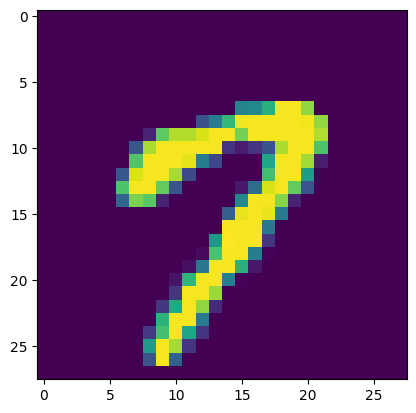

In [110]:
plt.imshow(train_x[15])

## Reshaping ##

In [111]:
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)

In [112]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

## Membuat model dengan sequential model ##

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_dim = 784),
    tf.keras.layers.Dense(num_class, activation = 'softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                25120     
                                                                 
 dense_30 (Dense)            (None, 12)                396       
                                                                 
Total params: 25,516
Trainable params: 25,516
Non-trainable params: 0
_________________________________________________________________


## Compile Model ##

In [114]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

## Training Model ##

In [115]:
history = model.fit(
    x = train_x, y= train_y,
    validation_data = (test_x, test_y),
    epochs = 10,
    steps_per_epoch = 250,
    verbose = 2
)

Epoch 1/10
250/250 - 3s - loss: 7.3972 - accuracy: 0.4128 - val_loss: 1.7391 - val_accuracy: 0.4734 - 3s/epoch - 11ms/step
Epoch 2/10
250/250 - 2s - loss: 1.4337 - accuracy: 0.5528 - val_loss: 1.3001 - val_accuracy: 0.6168 - 2s/epoch - 7ms/step
Epoch 3/10
250/250 - 2s - loss: 1.0841 - accuracy: 0.6966 - val_loss: 1.0475 - val_accuracy: 0.7468 - 2s/epoch - 6ms/step
Epoch 4/10
250/250 - 2s - loss: 0.8837 - accuracy: 0.7763 - val_loss: 0.8980 - val_accuracy: 0.7917 - 2s/epoch - 6ms/step
Epoch 5/10
250/250 - 2s - loss: 0.7491 - accuracy: 0.8126 - val_loss: 0.7823 - val_accuracy: 0.8312 - 2s/epoch - 6ms/step
Epoch 6/10
250/250 - 2s - loss: 0.6491 - accuracy: 0.8363 - val_loss: 0.6948 - val_accuracy: 0.8459 - 2s/epoch - 6ms/step
Epoch 7/10
250/250 - 2s - loss: 0.5731 - accuracy: 0.8551 - val_loss: 0.6373 - val_accuracy: 0.8558 - 2s/epoch - 7ms/step
Epoch 8/10
250/250 - 2s - loss: 0.5163 - accuracy: 0.8673 - val_loss: 0.6227 - val_accuracy: 0.8721 - 2s/epoch - 7ms/step
Epoch 9/10
250/250 - 2s